# `AA Workshop 14` — Coding Challenge

Complete the tasks below to practice text mining techniques from `W14_Textmining.ipynb`.

Guidelines:
- Work in order. Run each cell after editing with Shift+Enter.
- Keep answers short; focus on making things work.
- If a step fails, read the error and fix it.

By the end you will have exercised:
- transforming text documents to numerical vectors
- implementing classification models based on text data

## Task 1 - Text Classification for Movie Data

Let's practice text mining using a dataset of movie reviews. Your goal is to compute the sentiment (i.e., if text has a positive or negative connotation) of text documents. We will be using Movie Reviews text data from Rotten Tomatoes (https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data), which can be found in the data-folder (`movies.tsv`).

Complete the following steps:
- load and understand the data (what is the target?)
- construct bag of words model (tokenization, preprocessing)
- build and evaluate a classification model

### Load and explore data

In [1]:
# load the data
import pandas as pd

data=pd.read_csv('../data/movies.tsv', sep='\t')
data.head(20)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [2]:
# explore the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [3]:
# sentiment distribution
# 0 - negative 1 - somewhat negative 2 - neutral 3 - somewhat positive 4 - positive
data.Sentiment.value_counts()

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64

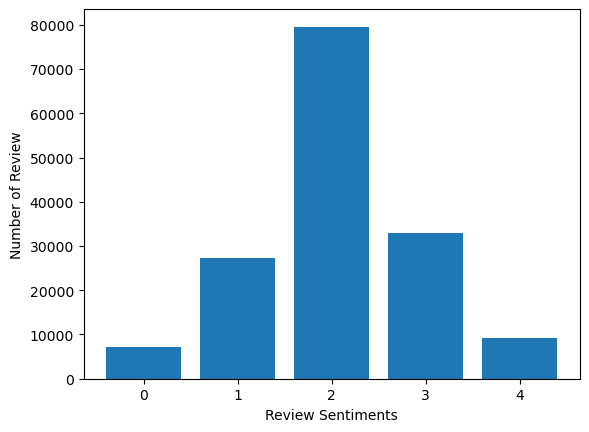

In [4]:
# visualize sentiment distribution 

from matplotlib import pyplot as plt

Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

### Bag of Words Model

In [5]:
from sklearn.feature_extraction.text import CountVectorizer # convert a collection of text documents to a matrix of token counts
from nltk.tokenize import word_tokenize

# lowercase=True - convert all characters to lowercase
# stop_words='english' - remove all stopwords based on the english language
# ngram_range = (1,1) - only consider unigrams, i.e. single words
# Word Tokenizer
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1), tokenizer = word_tokenize)
text_counts= cv.fit_transform(data['Phrase'])

# Term Document Matrix (document, term) - "total count"
print(text_counts)

C:\Users\micha\anaconda3\envs\AA_env\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 642515 stored elements and shape (156060, 16251)>
  Coords	Values
  (0, 12631)	1
  (0, 4851)	1
  (0, 3744)	1
  (0, 396)	1
  (0, 6144)	2
  (0, 6168)	1
  (0, 5903)	1
  (0, 25)	1
  (0, 9799)	1
  (0, 715)	1
  (0, 706)	1
  (0, 13712)	1
  (0, 30)	1
  (1, 12631)	1
  (1, 4851)	1
  (1, 3744)	1
  (1, 396)	1
  (1, 6144)	1
  (1, 6168)	1
  (2, 12631)	1
  (4, 12631)	1
  (5, 4851)	1
  (5, 3744)	1
  (5, 396)	1
  (5, 6144)	1
  :	:
  (156050, 12190)	1
  (156050, 9788)	1
  (156051, 12190)	1
  (156051, 9788)	1
  (156052, 12190)	1
  (156053, 20)	1
  (156053, 1451)	1
  (156053, 5618)	1
  (156053, 6624)	1
  (156053, 1151)	1
  (156053, 2503)	1
  (156054, 20)	1
  (156054, 5618)	1
  (156054, 6624)	1
  (156054, 1151)	1
  (156054, 2503)	1
  (156055, 20)	1
  (156055, 6624)	1
  (156056, 5618)	1
  (156056, 1151)	1
  (156056, 2503)	1
  (156057, 1151)	1
  (156057, 2503)	1
  (156058, 1151)	1
  (156059, 2503)	1


### Model Building and Evaluation

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3)

The multinomial Naive Bayes classifier is suitable for classification with
discrete features (e.g., word counts for text classification). The
multinomial distribution normally requires integer feature counts. However,
in practice, fractional counts such as tf-idf may also work.

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6094237259173823


### Try again but use TF-IDF instead of Total Count

In [8]:
# try again but use tf-idf instead of total counts
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = word_tokenize)
text_tf= tf.fit_transform(data['Phrase'])

X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3)

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

C:\Users\micha\anaconda3\envs\AA_env\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


MultinomialNB Accuracy: 0.5826818744927165


----